In [74]:
##################################################
# Анализ датасета с данными по покупкам товаров
##################################################


##################################################
# Описание данных в датасете
#
# user_data:
#    client – идентификатор пользователя,
#    premium – является ли клиент премиум,
#    age – возраст.
#
# logs:
#    client – идентификатор пользователя,
#    success – результат (успех - 1, нет - 0),
#    platform – платформа,
#    time – время в формате Unix
##################################################

In [75]:
# Импортируем библиотеки Pandas, Seaborn и Matplolob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [76]:
# Чтение файлов CSV с данными 

user_data = pd.read_csv('3_user_data.csv', sep = ',')
logs =  pd.read_csv('3_logs.csv', sep = ',')

In [77]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [78]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [79]:
# Проверим размер импортированных таблиц, типы переменных, посмотрим на описательную статистику

In [80]:
user_data.shape

(2954, 3)

In [81]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [82]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [83]:
logs.shape

(4500, 4)

In [84]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [85]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [86]:
logs.shape

(4500, 4)

In [87]:
# Определим количество уникальных значений в датасете 

logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [88]:
# Найдем какой клиент совершил больше всего успешных операций

success_client = logs.query('success == True')
success_client

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [89]:
df = success_client.groupby('client', as_index = False).agg({'success': 'count'}, index = False).sort_values('success')
df.tail(20)

,client,success
542,19024,2
1105,39050,2
1209,42970,2
2633,92743,2
1841,64746,2
1697,59666,2
2194,77164,2
1319,46918,2
1479,52583,2
2264,79320,3


In [90]:
# Наибольшее количество успешных операций клиента

max_success = df.success.max()
max_success

41

In [91]:
# Выведем всех клиентов по 'id', совершивших больше всего успешных операций

success_client_max = df.query('success == 41').sort_values('client')
success_client_max

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [92]:
# Найдем с какой платформы осуществляется наибольшее количество успешных операций

success_platform = success_client.groupby('platform').agg({'success': 'count'}).sort_values('success')
success_platform

,success
platform,
tablet,180
computer,1090
phone,2019


In [93]:
max_success_platform = success_platform.success.max()
max_success_platform

2019

In [94]:
# Определим какая платформа наиболее популярна среди премиумных клиентов

merge_df = user_data.merge(logs, on='client', how='inner')
merge_df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [95]:
premium_client = merge_df.query('premium == True')
premium_client

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


In [96]:
platform_premium = premium_client.value_counts('platform')
platform_premium

platform
phone       246
computer    150
tablet       24
dtype: int64

In [97]:
platform_premium.max()

246

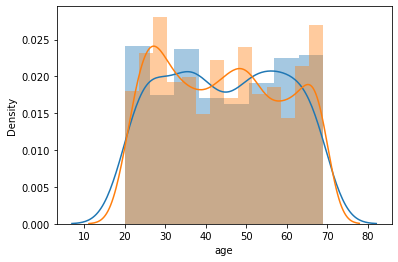

In [98]:
# Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

sns.distplot(merge_df.query('premium == True').age)
sns.distplot(merge_df.query('premium == False').age)

In [99]:
# Построим график распределения числа успешных операций

In [100]:
unique_num = df.nunique()
unique_num

client     2845
success       5
dtype: int64

In [101]:
df.value_counts('client')

client
99993    1
34817    1
33803    1
33784    1
33732    1
        ..
66536    1
66526    1
66491    1
66487    1
40       1
Length: 2845, dtype: int64

In [102]:
df.value_counts('success')

success
1     2791
2       43
41       9
40       1
3        1
dtype: int64

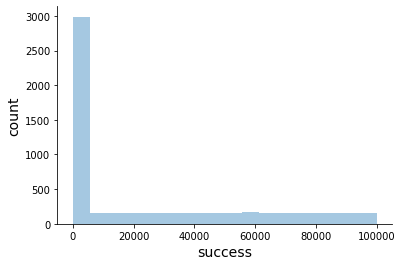

In [103]:
ax = sns.distplot(df, kde = False)
plt.xlabel('success', fontsize = 14)
plt.ylabel('count', fontsize = 14)
sns.despine()

In [104]:
# Визуализируем число успешных операций, сделанных на платформе 'computer', в зависимости от возраста клиента

In [105]:
success_computer_client = merge_df.query('success == True & platform == "computer"')
success_computer_client

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


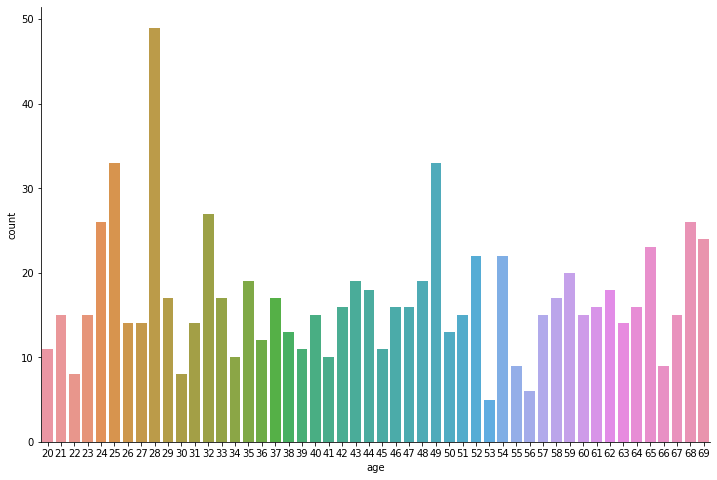

In [106]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age', data = success_computer_client)
sns.despine()

In [107]:
# Определим, клиенты какого возраста совершили наибольшее количество успешных действий

In [110]:
success_computer_client_age = success_computer_client.groupby('age', as_index = False).agg({'success': 'count'}, index = False).sort_values('success')
success_computer_client_age.tail(10)

,age,success
32,52,22
34,54,22
45,65,23
49,69,24
48,68,26
4,24,26
12,32,27
29,49,33
5,25,33
8,28,49
